# Performing cluster analysis on the provided Pharmaceutical Data<a class="anchor" id ="steps"></a>
# steps
[Read and preprocess the data](#step1)<br>
[Perform K-means cluster analysis](#step2)<br>
[Interpret and visualize the clusters](#step3)<br>







### Before we perform cluster analysis, we need to understand the purpose to create clusters on this dataset.

# Step 1: Read and preprocess the data<a class="anchor" id="step1"></a>

[go_back_up](#steps)



In [7]:
import pandas as pd
pharmacy = pd.read_csv('Pharmaceuticals-M02.csv')
pharmacy.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [17]:
pharmacy.shape

(21, 14)

In [13]:
pharmacy['Name'].value_counts()

Name
Abbott Laboratories                   1
IVAX Corporation                      1
Watson Pharmaceuticals, Inc.          1
Schering-Plough Corporation           1
Pharmacia Corporation                 1
Pfizer Inc                            1
Novartis AG                           1
Merck & Co., Inc.                     1
Medicis Pharmaceutical Corporation    1
Johnson & Johnson                     1
GlaxoSmithKline plc                   1
Allergan, Inc.                        1
Eli Lilly and Company                 1
Elan Corporation, plc                 1
Chattem, Inc                          1
Bristol-Myers Squibb Company          1
Bayer AG                              1
Aventis                               1
AstraZeneca PLC                       1
Amersham plc                          1
Wyeth                                 1
Name: count, dtype: int64

In [9]:
pharmacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     object 
 1   Name                   21 non-null     object 
 2   Market_Cap             21 non-null     float64
 3   Beta                   21 non-null     float64
 4   PE_Ratio               21 non-null     float64
 5   ROE                    21 non-null     float64
 6   ROA                    21 non-null     float64
 7   Asset_Turnover         21 non-null     float64
 8   Leverage               21 non-null     float64
 9   Rev_Growth             21 non-null     float64
 10  Net_Profit_Margin      21 non-null     float64
 11  Median_Recommendation  21 non-null     object 
 12  Location               21 non-null     object 
 13  Exchange               21 non-null     object 
dtypes: float64(9), object(5)
memory usage: 2.4+ KB


In [7]:
pharm_numerical = pharmacy.iloc[:,2:11]
pharm_numerical

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
5,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
6,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
7,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
8,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3
9,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4


In [11]:
#import libraries
import sklearn
from sklearn.preprocessing import StandardScaler

#create a scaler object
scaler = StandardScaler()
#standardize numerical features
pharmacy_std = scaler.fit_transform(pharm_numerical)
pharmacy_std

array([[ 1.88642282e-01, -8.21040576e-01, -4.78668159e-02,
         4.10803822e-02,  2.47578717e-01, -5.24754233e-16,
        -2.17335702e-01, -5.40800775e-01,  6.32054993e-02],
       [-8.75518007e-01, -4.61835324e-01,  3.58342950e+00,
        -8.75950197e-01, -9.65556995e-01,  9.45313187e-01,
         1.87358364e-02, -3.90551348e-01, -1.59203499e+00],
       [-8.97899295e-01, -2.62276851e-01, -2.99167599e-01,
        -7.40093815e-01, -5.22666180e-01,  9.45313187e-01,
        -4.14061984e-01, -5.86246589e-01, -7.01952839e-01],
       [ 1.74479124e-01, -2.28066827e-02, -2.48907443e-01,
         1.09008573e-01,  9.40799124e-01,  9.45313187e-01,
        -7.68169291e-01,  1.51088563e-01,  3.59899549e-01],
       [-1.83446626e-01, -8.21040576e-01, -3.36862717e-01,
        -2.71389297e-01, -5.80434547e-01, -4.72656593e-01,
        -3.22256386e-01,  1.24642544e+00, -4.36489742e-01],
       [-7.12554256e-01,  2.33198330e+00,  1.53173811e-01,
        -1.48730392e+00, -1.75505801e+00, -4.726565

# Step 2: Perform K-means cluster analysis<a class="anchor" id="step2"></a>
[go_back_up](#steps)

#### For the given data, how many clusters are recommended to perform k-means cluster analysis obtained by the elbow method?


To answer this question, you need to create elbow visualization to get the optimal k. Let's say we want k to be ranged in **(1,8)**. And when we use Kmeans() we set **init ='k-means++', max_iter=300,  n_init=10, random_state=0**.



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

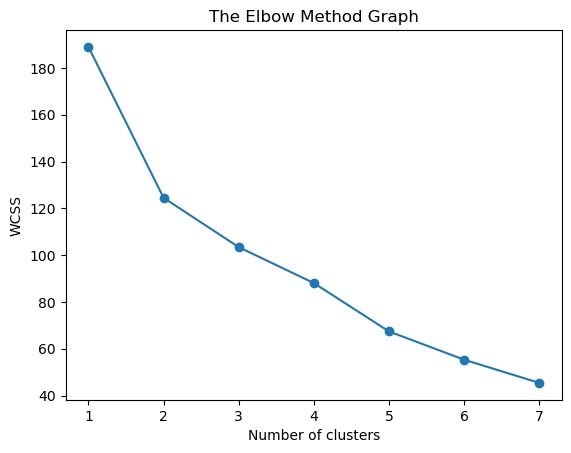

In [13]:
#import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#calculate wcss and iterate  through k
wcss =[]
for i in range(1,8):
    kmeans =KMeans(n_clusters = i,init ='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pharmacy_std)
    wcss.append(kmeans.inertia_)

#visualize the elbow
plt.plot(range(1,8),wcss, marker = "o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

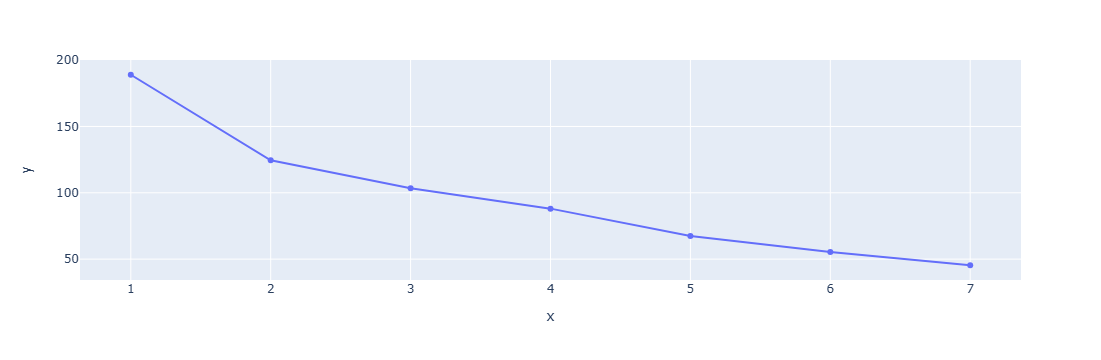

In [43]:
#elbow method visualized using lineplot in plotly
import plotly.express as px
fig = px.line(x= range(1,8),y= wcss, markers =True)
fig.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

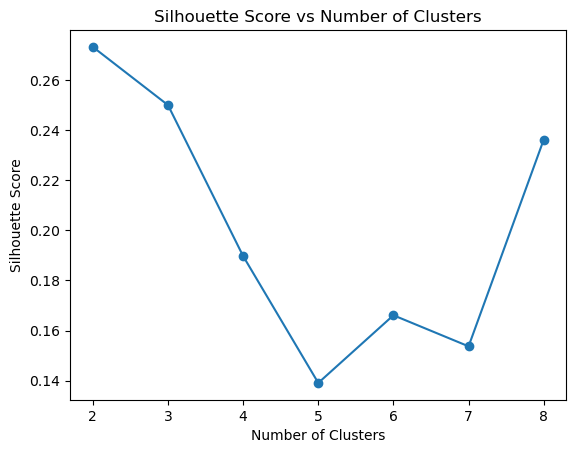

Optimal number of clusters: 2


In [15]:
from sklearn.metrics import silhouette_score

# Range of clusters to try
range_n_clusters = [2, 3, 4, 5, 6, 7,8]

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialize clustering algorithm
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pharmacy_std)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(pharmacy_std, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Choose the optimal number of clusters
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters:", optimal_n_clusters)

#### Now let's perform k-means cluster analysis using KMeans() by specifying the identifed k with **init ='k-means++', max_iter=300,  n_init=10, random_state=0**.



In [27]:
#perform k means cluster analysis using 5 clusters
km = KMeans(n_clusters= 2, init= 'k-means++', n_init= 10, max_iter= 300, random_state= 0).fit(pharmacy_std)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Which cluster label does Abbott Laboratories belong to?
To answer this question, first you need assign the data points into the clusters using **predict**,Then create a new column called **label** to save the cluster labels for each data point in the data.



In [29]:
#assign data points to clusters
clusters = km.predict(pharmacy_std)
clusters

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [31]:
pharmacy['label'] = clusters
pharmacy

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,label
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,1
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE,0
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE,0
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE,1
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,0
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE,0
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE,1
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ,0
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE,0
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE,1


# Step 3: Interpret and visualize the clusters<a class="anchor" id="step3"></a>

[go_back_up](#steps)
#### Which variable has the most distinctive power to separate the clusters in the data?

To answer the questions, we need to create the parallel coordinates. To do this,
1. First create a data frame to save centroids in each cluster in terms of the variables used to perform the k-means cluster analysis.



In [33]:
# create a dataframe to save the centroids for the clusters in terms of Annual Income and Spending Score
columns_list = ['Market_Cap','Beta','PE_Ratio','ROE','ROA','Asset_Turnover','Leverage','Rev_Growth','Net_Profit_Margin']
centroids = pd.DataFrame(km.cluster_centers_, columns = columns_list)
centroids

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,-0.759013,0.404248,0.311493,-0.740094,-0.940524,-0.519922,0.375466,0.327122,-0.769099
1,0.690012,-0.367499,-0.283176,0.672813,0.855022,0.472657,-0.341333,-0.297383,0.699181


2. Then, add a new column called "cluster" to indicate the index of the clusters for each set of the centroids.


In [35]:
# add a new column called "cluster" to indicate the index of the clusters for each set of the centroids
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,cluster
0,-0.759013,0.404248,0.311493,-0.740094,-0.940524,-0.519922,0.375466,0.327122,-0.769099,Cluster 0
1,0.690012,-0.367499,-0.283176,0.672813,0.855022,0.472657,-0.341333,-0.297383,0.699181,Cluster 1


3. Then, create parallel coordinates to visualize the centroids for each cluster



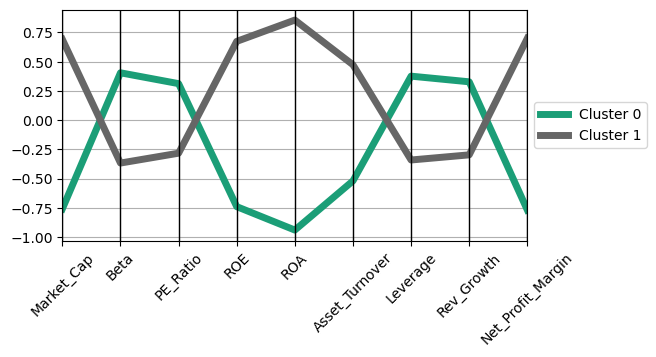

In [37]:
# create parallel coordinates to visualize the centroids for each cluster
#import library
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

#parallel coordinates visualization
plt.figure(figsize=(6,3))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Rotate x-axis labels
plt.xticks(rotation=45)  # Adjust the angle as needed

# Show plot
plt.show()

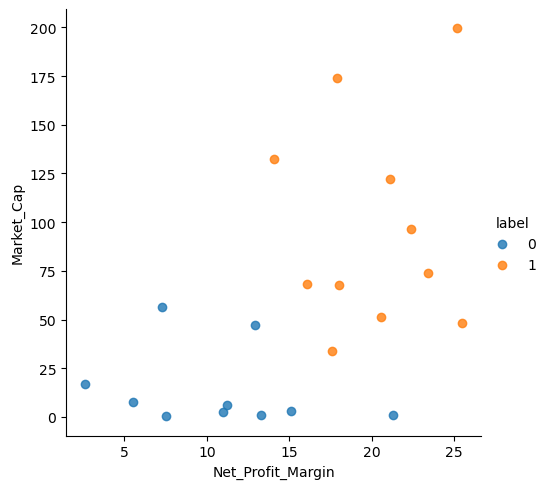

In [39]:
#visualize the clusters using two variables Annual Income and Spending Score

import seaborn as sns
sns.lmplot(data=pharmacy, y='Market_Cap', x='Net_Profit_Margin', hue='label', fit_reg=False,legend=True)

#### Q10. Based on your analysis, what could be concluded?
